## ENSE 496AD - Lab 4 - Support Vector Machines

In this lab you will use numpy to implement a Support Vector Machine with the Maximum Margin Classifier using Hard Margins.  You will train the model using Stochastic Gradient Descent.  Finally, you will use the model on a real world dataset, predicting breast cancer. 

### Part 1: Hard-Margin Maximum Margin Classifier SVM
In this section you will implement the SVM architecture. To begin, import numpy, pandas, matplotlib and set matplotlib to render in the notebook:

In [860]:
#Your code here!
import numpy as np
import matplotlib.pyplot as plt

This is a synthetic dataset for creating and testing your algorithm. It is just a bunch of random points in two clusters.

In [861]:
# completely synthetic dataset. Just a bunch of random points in two clusters!
X_train = np.array([[ 6.96663236, -2.56413998], [ 7.08440547, -1.58297496], [ 1.59401457, 10.70235682], [ 8.31979132, -1.83871502],
                    [ 8.76704515, -2.17708847], [-0.17576187,  9.53658348], [ 2.59936719,  8.75014744], [10.70968352, -3.41964297],
                    [ 0.12774537,  8.39914911], [ 8.7231654 , -0.79943684], [-0.44417429,  8.26528965], [-0.35445391,  8.62273782],
                    [-0.3051959 ,  8.77291032], [ 6.44811592, -0.50833227], [-1.38434493,  8.49291287], [ 8.16274594, -3.26126235],
                    [ 7.2433519 , -3.69881207], [ 0.43880334,  8.70197902], [-0.0656843 ,  9.1262299 ], [ 5.30047761, -3.44010414],
                    [ 2.9644372 , 10.15117072], [ 2.15116586,  9.87478664], [ 6.64196648, -3.47847631], [ 6.90354937, -3.26888755],
                    [ 0.01818178, 10.00861805], [ 8.77536964, -3.26027474], [ 7.70871273, -3.40181157], [ 7.31484506, -2.74038082],
                    [ 6.5742327 , -2.42588737], [ 0.25057702,  7.51370852], [ 0.78653136,  8.7029894 ], [ 1.54844767,  9.24159451],
                    [ 5.46806687, -1.53042928], [ 2.66115711, 10.49187367], [ 6.82041955, -4.49727702], [-0.69607604,  7.734637  ],
                    [ 7.21938966, -3.10013902], [ 7.17864956, -2.17662369], [ 7.99419466, -1.93472022], [ 9.0734713 , -2.06664736],
                    [ 1.36893319,  9.32706109], [ 0.61964424, 10.32935828], [ 2.43985202,  9.24093868], [ 1.57904414,  7.24063942],
                    [ 7.58639384, -2.99198749], [ 6.05710246, -1.26682442], [ 7.23355672, -2.24157832], [ 2.63552055, 10.54803324], 
                    [ 2.89608198,  9.36411293], [ 0.54994864,  8.39962354]])
y_train = np.array([[0], [0], [1], [0], [0], [1], [1], [0], [1], [0], 
                    [1], [1], [1], [0], [1], [0], [0], [1], [1], [0], 
                    [1], [1], [0], [0], [1], [0], [0], [0], [0], [1], 
                    [1], [1], [0], [1], [0], [1], [0], [0], [0], [0], 
                    [1], [1], [1], [1], [0], [0], [0], [1], [1], [1]])

Using matplotlib, visualize your dataset in a scatter plot. Wherever a value is 1, render a red circle, and wherever a value is blue, render a blue square.

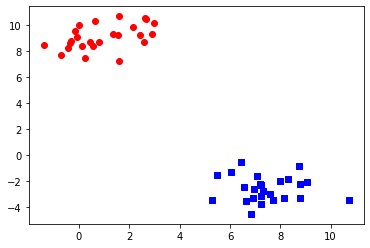

In [862]:
def plotPoints (X_train, y_train):
    for index in range(len(X_train)):
        if y_train[index] == 1:
            plt.scatter(X_train[index,0], X_train[index,1], c="r")
        else:
            plt.scatter(X_train[index,0], X_train[index,1],marker="s", c="b")
    #Your code here!
plotPoints(X_train, y_train)

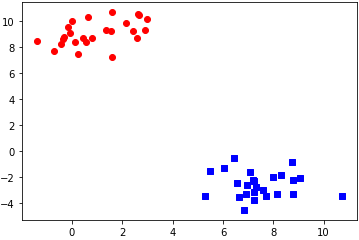

Initialize the weights and bias terms below. Initialize all values to zero. Recall that the weight vector should have the same number of terms as the number of features. Write a general implementation that can work with any number of features.

In [863]:
def init_w_b (X_train):
    feature = len(X_train[0])
    w = np.zeros(feature)
    b = 0
    # your code here
    return w,b

Test Cell

Call:
~~~
w, b = init_w_b(X_train)
print (w,b)
~~~
Expected Output
~~~
[0. 0.] 0
~~~

In [864]:
w, b = init_w_b(X_train)
print (w,b)

[0. 0.] 0


SVM's require the data labels to be represented as 1 or -1. Complete the init_y function below. This function must return a numpy array with a -1 placed wherever the neg_value appears, and a 1 wherever the pos_value appears.

Eg. If the labels were 
~~~
[["cat"], ["dog"]]
~~~
, and the function was called 
~~~
init_y(Y_train, "cat", "dog")
~~~
the resulting array would be:
~~~
[[-1], [1]]
~~~

In [865]:
def init_y(Y_train, neg_value, pos_value):
    # your code here
    y_array = Y_train.copy()
    for index in range(len(Y_train)):
        if Y_train[index] == neg_value:
            y_array[index] = -1
        if Y_train[index] == pos_value:
            y_array[index] = 1
    return y_array

Test Cell

Call:
~~~
Y_train = init_y(Y_train, 0, 1)
print (Y_train[:5])
~~~
Expected Output
~~~
[[-1]
 [-1]
 [ 1]
 [-1]
 [-1]]
~~~

In [866]:
y_train = init_y(y_train, 0, 1)
print (y_train[:5])

[[-1]
 [-1]
 [ 1]
 [-1]
 [-1]]


In the next two sections you will implement Stochastic Gradient Descent. First, implement the compute_cost_gradient function, which will estimate the gradient of the function using a single training sample. This function will implement the equation:

if $y_i ( x_i \cdot w - b) \ge 1$:

$ \frac{\partial J}{\partial w_k} = 2 \lambda w_k $

$ \frac{\partial J}{\partial b} = 0 $

else

$ \frac{\partial J}{\partial w_k} = 2 \lambda w_k - y_i \cdot x_i$

$ \frac{\partial J}{\partial b} = y_i $

where $\lambda$ is the regularization hyperparameter.

In [867]:
def compute_cost_gradient (X_sample, y_sample, reg_param, w, b):
    costfunction = y_sample * (np.dot(X_sample,w)-b)
    if costfunction >= 1 :
        dw = 2 * reg_param * w
        db = 0.0
    else:
        dw = 2 * reg_param * w - y_sample * X_sample
        db = y_sample
    # your code here
    return dw, db

Test Cell

Call:
~~~
dw, db = compute_cost_gradient ([0,0], 1, 0.01, [1,1], 1)
print (dw, db)
dw, db = compute_cost_gradient (X_sample, y_sample, reg_param, w, b)
print (dw, db)
~~~
Expected Output
~~~
[0.02 0.02] 0.0
[1.02 0.02] -1.0
~~~

In [868]:
dw, db = compute_cost_gradient (np.array([1.0,1.0]), np.array([1.0]), 0.01, np.array([1.0,1.0]), 1.0)
print (dw, db)
dw, db = compute_cost_gradient (np.array([1.0,0.0]), np.array([-1.0]), 0.01, np.array([1.0,1.0]), 1.0)
print (dw, db)


[0.02 0.02] 0.0
[1.02 0.02] [-1.]


In the next cell, implement the train function, which will perform stochastic gradient descent. This function will, in each epoch, for each training sample, estimate the gradient using the compute_cost_gradient function, and then update the weight vector and bias term.

Recall, in gradient descent, the update terms are given by:

$ w_k = w_k - \alpha \frac{\partial J}{\partial w_k}$

$ b = b - \alpha \frac{\partial J}{\partial b}$

where $\alpha$ is the learning rate. 

In [869]:
def train(X_train, y_train, learning_rate=0.001, reg_param=0.01, epochs=1000): 
    w, b = init_w_b(X_train)
    number_samples, number_features = X_train.shape
    for _ in range(epochs): 
        for i in range(number_samples):
            dw, db = compute_cost_gradient(X_train[i], y_train[i], reg_param, w, b)
            w = w - learning_rate * dw
            b = b - learning_rate * db           
            #Your code here!
    return w, b 

Test Cell

Call:
~~~
w, b = train(X_train, Y_train)
print (w, b)
~~~
Expected Output
~~~
[-0.14918368  0.1746837 ] [0.014]
~~~

In [870]:
w, b = train(X_train, y_train)
print (w,b)

[-0.14599819  0.17198231] [0.013]


Implement the predict function below, which given a sample (or a matrix of samples) will produce predictions for each.

In [871]:
def predict(X_test, w, b):
    #print(X_test)
    #print(w)
    condition = np.dot(w,X_test) - b
    #initial y_predict to the same shape of w
    y_predict = condition 
    for index in range(len(condition)):
        if condition[index] >=0:
            y_predict[index] = 1 
        else :
            y_predict[index] = -1
    return y_predict
    #Your code here!

Test Cell

Call:
~~~
y_predict = predict (np.array([[8, -4],[2,6]]), w, b)
print (y_predict)
~~~
Expected Output
~~~
[-1.  1.]
~~~

In [872]:
y_predict = predict (np.array([[8, -4],[2,6]]), w, b)
print (y_predict)

[-1.  1.]


Implement the compute_accuracy function below which takes a vector of sample predictions and a vector of actual sample labels, and computes the percentage of samples which were correctly  

In [873]:
def compute_accuracy(y_predict, y_actual):
    counter = 0
    for index in range(len(y_actual)):
        if y_predict[index] == y_actual[index]:
            counter += 1
    accuracy = counter / len(y_actual)  
    return accuracy
    #Your code here!

Test Cell

Call:
~~~
y_predict = np.array([-1, 1, -1, -1])
y_actual  = np.array([-1, 1, -1,  1])
accuracy = compute_accuracy(y_predict, y_actual)
print (accuracy)

~~~
Expected Output
~~~
0.75
~~~

In [874]:
y_predict = np.array([-1, 1, -1, -1])
y_actual  = np.array([-1, 1, -1,  1])
accuracy = compute_accuracy(y_predict, y_actual)
print (accuracy)


0.75


Implement the following function for visualizing a trained SVM in two dimensions. Make use of the plot_hyperplane_line function which plots the intersection of the learned plane with intersecting planes. 

In [875]:
def plot_svm(X_train, y_train, w, b):

    def plot_hyperplane_line(x0_left, x0_right, w, b, height, axes, lineOptions,color):
        '''Plot the projection of a line from two interecting planes on a pyplot fig
        
        Parameters:
        x0_left: the lowest value for feature zero across all samples, used as the starting point to draw the line
        x0_right: the highest value for feature zero across all samples, used to terminate the line
        w: the learned w vector. Together, with b, defines a plane
        b: the learned b term. Together, with w, defines a plane
        height: the desired height of the intersecting plane, eg. 0, 1, -1
        axes: the pyplot subplot on which to draw the line
        lineOptions: line formatting options, as per the pyplot plot function
        '''
        # solve for the second dimension for the starting and ending points of the line
        x1_left  = (-w[0] * x0_left  + b - height) / w[1]
        x1_right = (-w[0] * x0_right + b - height) / w[1]
        # plot the line using the starting and ending points 
        axes.plot([x0_left, x0_right],[x1_left, x1_right], lineOptions, c=color)
    
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    plotPoints(X_train, y_train)

    x0_min = np.amin(X_train[:,0])
    x0_max = np.amax(X_train[:,0])
    x1_min = np.amin(X_train[:,1])
    x1_max = np.amax(X_train[:,1])

    # use plot_hyperplane_line to plot the decision boundary as a solid red line, 
    # and the margins as black dashed lines
    
    #Your code here!
    #w,b = train(X_train, y_train)
    plot_hyperplane_line(x0_min, x0_max, w, b, 1, axes, '--','k')
    plot_hyperplane_line(x0_min, x0_max, w, b, 0, axes, '-','r')
    plot_hyperplane_line(x0_min, x0_max, w, b, -1, axes, '--','k')

    axes.set_ylim([x1_min-1,x1_max+1])
    
    plt.title("Linear SVM (Hard Maximum Margin Classification)")

    plt.show()

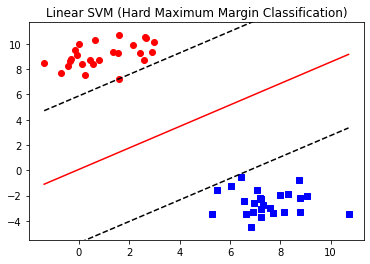

In [876]:
plot_svm(X_train, y_train, w, b)

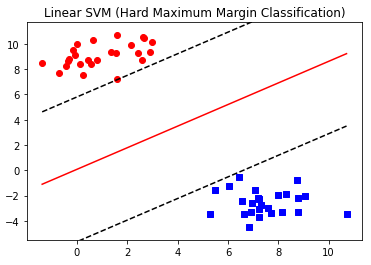

### Part 2: Applying the SVM to a real world dataset

In this part of the notebook you will apply the SVM model to a real world dataset for predicting breast cancer.

The dataset includes diagnoses, which are Malignant (cancerous), and Benign (cancer free).

Begin by opening the dataset in pandas:

In [877]:
#Your code here!
import pandas as pd

Inspect the dataset using the methods you know. 

In [878]:
#Your code here!
dataframe =pd.read_csv("breast-cancer-wisconsin-data.csv")
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [879]:
#Your code here!

In [880]:
#Your code here!


Split the dataset into two groups, X_train and X_test. X_train should contain the first 60% of the samples, and X_test should contain the remaining samples.

In [881]:
#Your code here!
X_train = dataframe.loc[:, "radius_mean":"fractal_dimension_worst"]
X_train = X_train.head(int(len(X_train)*0.6))
X_test = X_train.tail(int(len(X_train)*0.4))
#print(0.6*len(X_train))
#X_train.tail()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 205 to 340
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              136 non-null    float64
 1   texture_mean             136 non-null    float64
 2   perimeter_mean           136 non-null    float64
 3   area_mean                136 non-null    float64
 4   smoothness_mean          136 non-null    float64
 5   compactness_mean         136 non-null    float64
 6   concavity_mean           136 non-null    float64
 7   concave points_mean      136 non-null    float64
 8   symmetry_mean            136 non-null    float64
 9   fractal_dimension_mean   136 non-null    float64
 10  radius_se                136 non-null    float64
 11  texture_se               136 non-null    float64
 12  perimeter_se             136 non-null    float64
 13  area_se                  136 non-null    float64
 14  smoothness_se           

From X_train and X_test, create also Y_train and Y_test. Assign Malignant samples to -1, and Benign samples to 1.

In [882]:
#Your code here!
Y_train = dataframe["diagnosis"]
Y_train = Y_train.head(int(len(Y_train)*0.6))
Y_test = Y_train.tail(int(len(Y_train)*0.4))
#print(0.6*len(Y_train))
#Y_train.head()
#Y_test.tail()
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
y_train = init_y(Y_train, 'M', 'B')
y_test = init_y(Y_test, 'M', 'B')

Remove the "id" and "diagnosis" columns from X_train and x_test

In [883]:
#Your code here!
#X_train.reset_index(drop=True, inplace=True)
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
205,15.120,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
206,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,0.06285,...,10.42,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.1111,0.1486,0.19320,0.10960,0.3275,0.06469
208,13.110,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.1349,0.4402,0.31620,0.11260,0.4128,0.10760
209,15.270,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,...,17.38,15.92,113.70,932.7,0.1222,0.2186,0.29620,0.10350,0.2320,0.07474


Perform any last checks to ensure the datasets are formatted as expected below. Once you are satisfied, cast the datasets to 2D Numpy arrays:

In [884]:
#Your code here!
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


Train the SVM on the dataset. Use all of the remaining features in X. This will produce a high dimensional model which cannot be plotted.

In [885]:
#Your code here!
w, b = train(X_train, y_train)
#print(len(X_test))
#print(len(w))
y_predict = predict(np.transpose(X_test), w, b)
#print(y_predict)
#print(y_test)

Using the learned weights and bias terms, compute the accuracy for the trained model.

In [886]:
#Your code here!
accuracy = compute_accuracy(y_predict, y_test)
print(accuracy)



0.8161764705882353


 Based on this accuracy, do you believe the data to be mostly linearly separable? Why or why not?

In [ ]:
#Yes, it is a good fit, the data can be "linearly"(in a high dimensional) separable.
#Because we only use 60 percent to train the weight and bias,
#if we use more data to train, we may have a accuracy greater than 81.6%,it means 81.6% percent can be separate correctly in our test
# and that is a good number to predict if the condition is not that strict